In [1]:
import pandas as pd
import os
from PIL import Image
from IPython.display import clear_output

from dcc_functions import how_many_files_in_folder

In [2]:
DATA_FOLDER = "./data/01_raw/"
INITIAL_FOLDERS = ["train", "val", "label_book"]
FOLDERS = ["train", "val"]
LABELS = ["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"]

In [3]:
# We extract the files list of all folders and sub-folders
all_files = []

for folder in INITIAL_FOLDERS:
    for label in LABELS:
        nb_files, files = how_many_files_in_folder(DATA_FOLDER+folder+"/"+label+"/*.png")
        all_files = all_files + files

nb_all_files = len(all_files)

In [4]:
# We create a DataFrame to store all files information
files_sizes = pd.DataFrame(columns=["file", "file_size"])

# For every file listed in the folders
for idx, file in enumerate(all_files):

    clear_output(wait=True)

    # We extract the corresponding file size
    file_stats = os.stat(file)
    file_size = file_stats.st_size
    
    # We exclude the folder path to keep only the file name
    file = file[-40:]
    
    # And add the corresponding information in the DataFrame
    new_row = {"file": file, "file_size": file_size}

    files_sizes = files_sizes.append(new_row, ignore_index=True)
        
    print(nb_all_files-idx)

files_sizes

1


,file,file_size
0,ab9fb784-ce5d-11eb-b317-38f9d35ea60f.png,1055
1,aba24486-ce5d-11eb-b317-38f9d35ea60f.png,1064
2,aba35128-ce5d-11eb-b317-38f9d35ea60f.png,1261
3,aba4001e-ce5d-11eb-b317-38f9d35ea60f.png,1102
4,aba4a622-ce5d-11eb-b317-38f9d35ea60f.png,1126
...,...,...
2927,a97df060-ce5d-11eb-b317-38f9d35ea60f.png,2035
2928,a9a4255a-ce5d-11eb-b317-38f9d35ea60f.png,1660
2929,a9b14348-ce5d-11eb-b317-38f9d35ea60f.png,2200
2930,a9d6228a-ce5d-11eb-b317-38f9d35ea60f.png,2093


In [5]:
# We extract the pictures information collected during the visual review
files_analysis = pd.read_excel("./roman-numerals-labeling-plb-20210830.xlsx", sheet_name="analysis", usecols="B:L")

files_analysis["style"] = files_analysis["form"]+"_"+files_analysis["font"]

files_analysis

,file,subset,label,to_be_removed,true_label,form,font,num_quality,background_quality,hor_sym,ver_sym,style
0,ac604594-ce5d-11eb-b317-38f9d35ea60f.png,train,i,1,0,I,rom,1.0,2.0,1.0,1.0,I_rom
1,ac19def6-ce5d-11eb-b317-38f9d35ea60f.png,train,i,0,0,I,rom,1.0,2.0,1.0,1.0,I_rom
2,ac4fe7b2-ce5d-11eb-b317-38f9d35ea60f.png,train,i,0,0,I,rom,1.0,2.0,1.0,1.0,I_rom
3,ac2da594-ce5d-11eb-b317-38f9d35ea60f.png,train,i,0,0,I,rom,1.0,2.0,1.0,1.0,I_rom
4,ac5e0554-ce5d-11eb-b317-38f9d35ea60f.png,train,i,1,0,I,rom,2.0,2.0,1.0,1.0,I_rom
...,...,...,...,...,...,...,...,...,...,...,...,...
2927,b304a6f6-ce5d-11eb-b317-38f9d35ea60f.png,val,x,0,0,X,class,1.0,1.0,1.0,1.0,X_class
2928,b316b346-ce5d-11eb-b317-38f9d35ea60f.png,val,x,0,0,X,class,1.0,1.0,1.0,1.0,X_class
2929,b2f745d8-ce5d-11eb-b317-38f9d35ea60f.png,val,x,0,0,X,class,1.0,1.0,1.0,1.0,X_class
2930,b32314a6-ce5d-11eb-b317-38f9d35ea60f.png,val,x,0,0,X,class,1.0,1.0,1.0,1.0,X_class


In [6]:
# We combine all information in one single DataFrame
files_info = pd.merge(files_analysis, files_sizes, how="inner")
files_info = files_info.sort_values(by=["style","file_size"])
files_info

,file,subset,label,to_be_removed,true_label,form,font,num_quality,background_quality,hor_sym,ver_sym,style,file_size
669,b08b53ac-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,0,0,III,class,1.0,1.0,1.0,1.0,III_class,1081
664,b35ef2b4-ce5d-11eb-b317-38f9d35ea60f.png,val,iii,0,0,III,class,1.0,1.0,1.0,1.0,III_class,1117
668,b07d2368-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,0,0,III,class,1.0,1.0,1.0,1.0,III_class,1132
708,b0f00afe-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,1,0,III,class,3.0,2.0,1.0,1.0,III_class,1166
683,b06d0c12-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,0,0,III,class,1.0,1.0,1.0,1.0,III_class,1181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,b0882bfa-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5581
2579,ad9404f0-ce5d-11eb-b317-38f9d35ea60f.png,train,viii,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940
736,b068069a-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17039
738,b055bd00-ce5d-11eb-b317-38f9d35ea60f.png,train,iii,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21189


b0f36136-ce5d-11eb-b317-38f9d35ea60f.png : b38b17f4-ce5d-11eb-b317-38f9d35ea60f.png


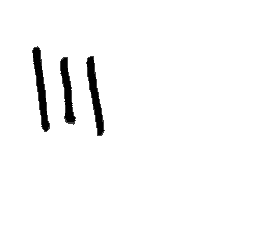

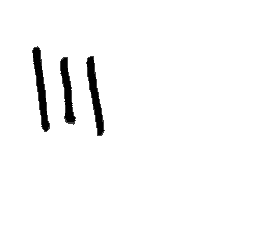

b046c5fc-ce5d-11eb-b317-38f9d35ea60f.png : b34a7334-ce5d-11eb-b317-38f9d35ea60f.png


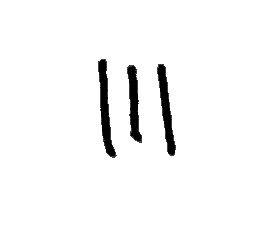

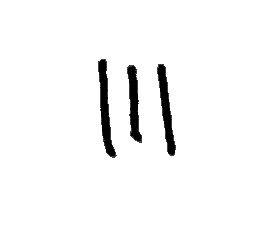

b3782068-ce5d-11eb-b317-38f9d35ea60f.png : b0e67e44-ce5d-11eb-b317-38f9d35ea60f.png


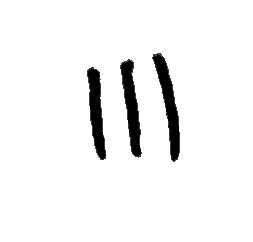

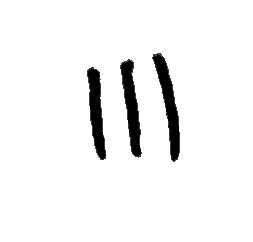

b0eb7124-ce5d-11eb-b317-38f9d35ea60f.png : b3860df4-ce5d-11eb-b317-38f9d35ea60f.png
aaf25f62-ce5d-11eb-b317-38f9d35ea60f.png : b0eb7124-ce5d-11eb-b317-38f9d35ea60f.png
b0d429b0-ce5d-11eb-b317-38f9d35ea60f.png : b366b030-ce5d-11eb-b317-38f9d35ea60f.png
b381fbc4-ce5d-11eb-b317-38f9d35ea60f.png : b0e73cee-ce5d-11eb-b317-38f9d35ea60f.png
b0f2b4a2-ce5d-11eb-b317-38f9d35ea60f.png : b389a8f6-ce5d-11eb-b317-38f9d35ea60f.png
b3686998-ce5d-11eb-b317-38f9d35ea60f.png : b0d910ce-ce5d-11eb-b317-38f9d35ea60f.png
b3437f02-ce5d-11eb-b317-38f9d35ea60f.png : b0e134e8-ce5d-11eb-b317-38f9d35ea60f.png
b15eea28-ce5d-11eb-b317-38f9d35ea60f.png : b15a3c44-ce5d-11eb-b317-38f9d35ea60f.png
add92238-ce5d-11eb-b317-38f9d35ea60f.png : ab419208-ce5d-11eb-b317-38f9d35ea60f.png
ab98f020-ce5d-11eb-b317-38f9d35ea60f.png : ab63bb4e-ce5d-11eb-b317-38f9d35ea60f.png
ab99c1bc-ce5d-11eb-b317-38f9d35ea60f.png : ab6d0f14-ce5d-11eb-b317-38f9d35ea60f.png
ab5e1324-ce5d-11eb-b317-38f9d35ea60f.png : ab662424-ce5d-11eb-b317-38f9d35ea

In [7]:
previous_row, previous_file = "", ""

step = 0

# Since the DataFrame is sorted by style and size
for index, row in files_info.iterrows():
    
    # In case two consecutive files have the same style and size
    if previous_row == row["file_size"]:
        print(row["file"], ":", previous_file)
        
        # We display them to manually compare the pair
        
        if step < 3: # Displaying only the first 3 examples
        
            im = Image.open(DATA_FOLDER+row["subset"]+"/"+row["label"]+"/"+row["file"])
            imp = Image.open(DATA_FOLDER+previous_subset+"/"+previous_label+"/"+previous_file)
            display(im, imp)
        
        step += 1
    
    previous_subset = row["subset"]
    previous_label = row["label"]
    previous_row = row["file_size"]
    previous_file = row["file"]
